# Categorical Data
Dataset: mushroom  
column 1: class(edible/poisonous)  
column 2-23: features  
Predicting if the mushroom is edible or not based on the features

## 1. Load packages and import data

In [29]:
#import packages and import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
data = pd.read_csv('mushroom.csv', header=None)
# check data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2. Data Cleaning & Proccessing
Add header and remove Nas  
Check data strcuture

In [30]:
# add colunm names
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

#assigning column name
data.columns = columns

#transform categorical data into numbers for the model to work on
data_encoded = data.copy()
label = LabelEncoder()
for col in data_encoded.columns:
    data_encoded[col] = label.fit_transform(data_encoded[col])

data_encoded.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [31]:
#checking data structure
data.head()
data.nunique()
data.info() #no missing value
data.apply(lambda col: col.unique())
# value count for each column
for col in data.columns:
    print(data[col].value_counts())
    print("____________________________") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 3. Train and Evaluate Naive Bayes Model  
Set features and target variables  
Split data  
Train model  
Evaluation


Accuracy: 0.9458572600492207
              precision    recall  f1-score   support

      edible       0.91      1.00      0.95      1257
   poisonous       1.00      0.89      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



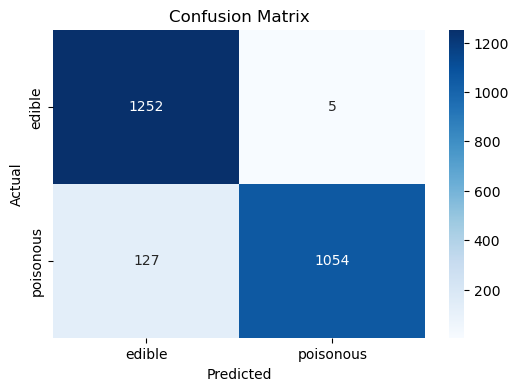

AUC score: 0.9974


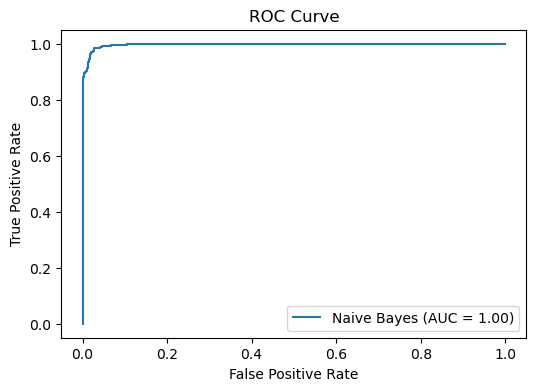

In [32]:
# assign features and target variables(poisonous/edible)
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# splitting data 30% for test, 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train Naive Bayes model
model = CategoricalNB()
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# evaluate accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# calculate auc score
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUC score: {auc_score:.4f}')

#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Classification Report Interpretation

When the model predicts *edible*:  
- **precision = 0.94**: it’s right 94% of the time.  
- **recall = 1**: it found 100% of all edible mushrooms  

When the model predicts *poisonous*:  
- **precision = 0.99**: it’s correct 99% of the time  
- **recall = 0.9**: it found 90% of all poisonous mushrooms, but missed 10%.  


# Compare with other algorithms
Logistic Regression  
Decision Tree  
Random Forest

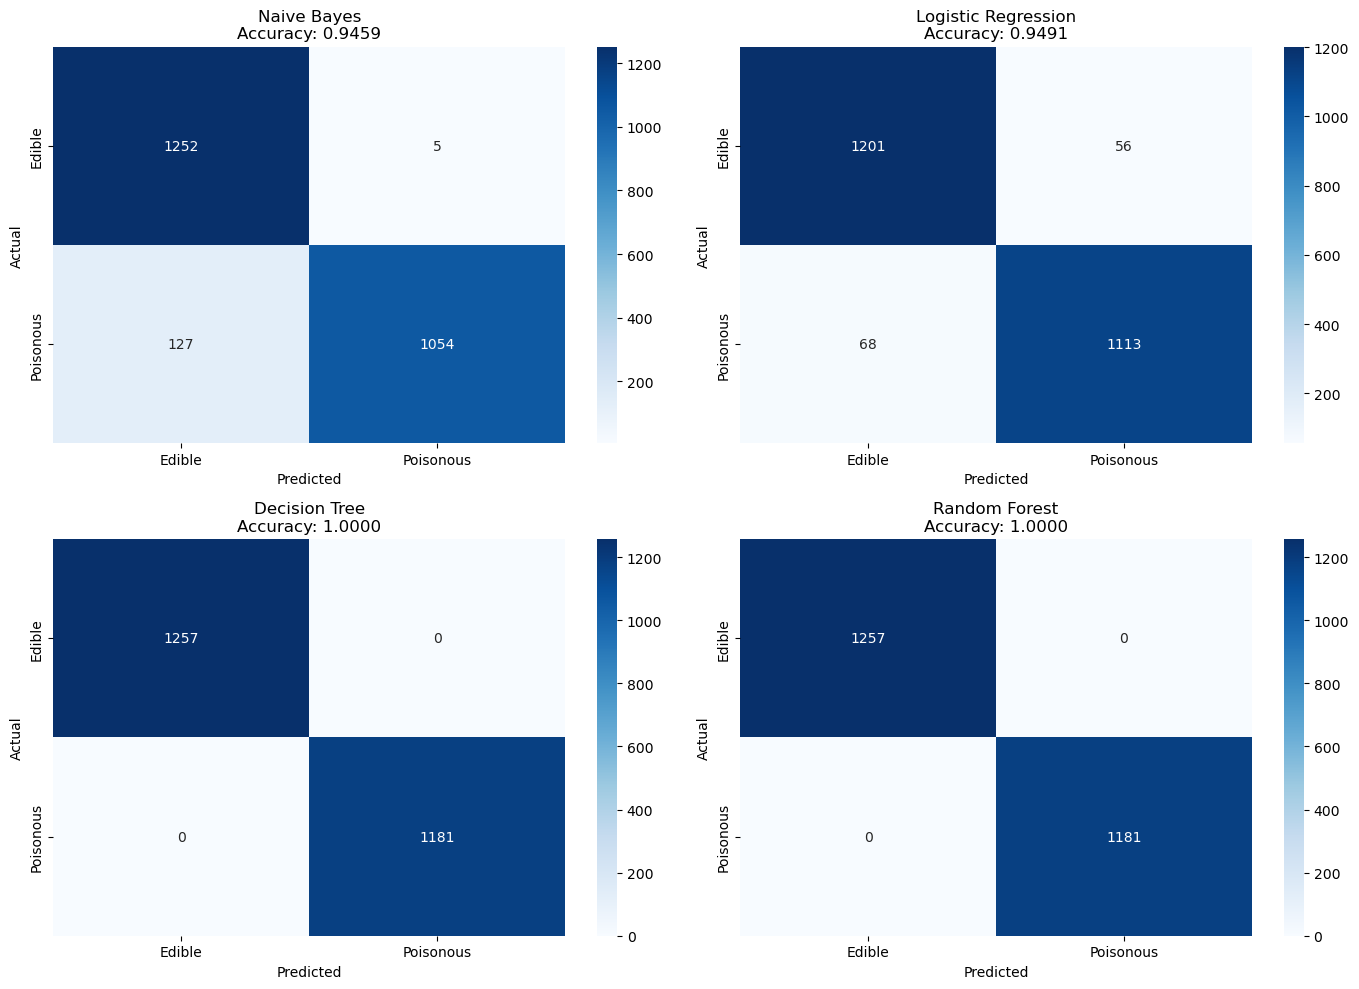

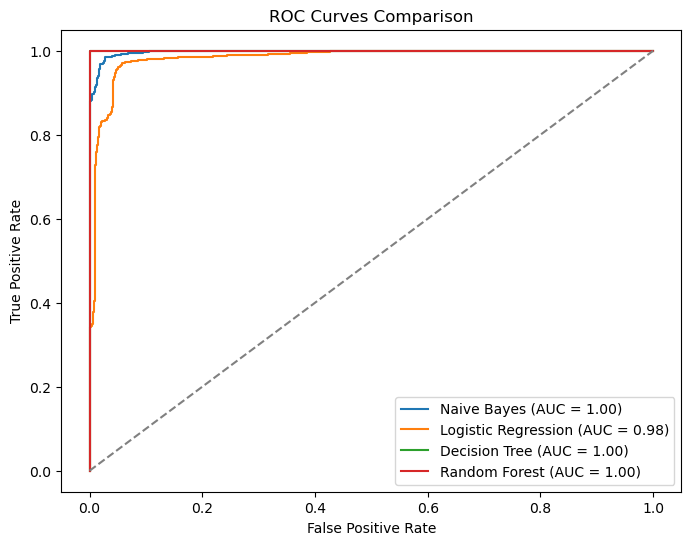

Naive Bayes - Accuracy: 0.9459, AUC: 0.9974
Logistic Regression - Accuracy: 0.9491, AUC: 0.9827
Decision Tree - Accuracy: 1.0000, AUC: 1.0000
Random Forest - Accuracy: 1.0000, AUC: 1.0000


In [33]:
#models we are comparing
models = {
    'Naive Bayes': CategoricalNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    results[model_name] = {'accuracy': acc, 'conf_matrix': cm, 'auc': auc, 'fpr': fpr, 'tpr': tpr}

#confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
    axes[idx].set_title(f'{model_name}\nAccuracy: {result["accuracy"]:.4f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# roc curves for all models
plt.figure(figsize=(8,6))
for model_name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{model_name} (AUC = {result["auc"]:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

#accuracy and AUC comparison
for model_name, result in results.items():
    print(f'{model_name} - Accuracy: {result["accuracy"]:.4f}, AUC: {result["auc"]:.4f}')